In [1]:
import numpy as np
import pandas as pd
import os
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def unique_jic_list():
    dfjic = pd.read_csv('NRDataKLM/JIC anonimised TUD 1.csv')
    alljic = dfjic['jic_code']
    print(len(alljic))
    uniquejic = set(alljic)
    return uniquejic

In [ ]:
#Read data
jic = pd.read_csv('NRDataKLM/JIC anonimised TUD 1.csv')
nr = pd.read_csv('NRDataKLM/NR anonimised TUD.csv')
wp = pd.read_csv('NRDataKLM/WP anonimised TUD.csv', delimiter=';')

#Datetime format correction
jic['jic_start_datetime'] = pd.to_datetime(jic['jic_start_datetime'],format="%d/%m/%Y %H:%M")
nr['nr_start_datetime'] = pd.to_datetime(nr['nr_start_datetime'],format="%d/%m/%Y %H:%M")
nr['nr_end_datetime'] = pd.to_datetime(nr['nr_end_datetime'],format="%d/%m/%Y %H:%M")
nr['nr_wp_actual_start'] = pd.to_datetime(nr['nr_wp_actual_start'],format="%d/%m/%Y %H:%M")
nr['nr_wp_actual_end'] = pd.to_datetime(nr['nr_wp_actual_end'],format="%d/%m/%Y %H:%M")

In [4]:
ujiclst = unique_jic_list()
lst_set_lengths = []

for i, jiccode in enumerate(ujiclst):
    print(f'({i}/{len(ujiclst)})')
    lst_datasets_size = []
    #Filter out needed jic based on jic_code in JIC dataframe
    escaped_jiccode = re.escape(jiccode)  # Escapes any special regex characters
    dfjic1 = jic[jic['jic_code'].str.contains(escaped_jiccode)]
    lst_set_lengths.append(dfjic1.shape[0])


747801
(0/10209)
(1/10209)
(2/10209)
(3/10209)
(4/10209)
(5/10209)
(6/10209)
(7/10209)
(8/10209)
(9/10209)
(10/10209)
(11/10209)
(12/10209)
(13/10209)
(14/10209)
(15/10209)
(16/10209)
(17/10209)
(18/10209)
(19/10209)
(20/10209)
(21/10209)
(22/10209)
(23/10209)
(24/10209)
(25/10209)
(26/10209)
(27/10209)
(28/10209)
(29/10209)
(30/10209)
(31/10209)
(32/10209)
(33/10209)
(34/10209)
(35/10209)
(36/10209)
(37/10209)
(38/10209)
(39/10209)
(40/10209)
(41/10209)
(42/10209)
(43/10209)
(44/10209)
(45/10209)
(46/10209)
(47/10209)
(48/10209)
(49/10209)
(50/10209)
(51/10209)
(52/10209)
(53/10209)
(54/10209)
(55/10209)
(56/10209)
(57/10209)
(58/10209)
(59/10209)
(60/10209)
(61/10209)
(62/10209)
(63/10209)
(64/10209)
(65/10209)
(66/10209)
(67/10209)
(68/10209)
(69/10209)
(70/10209)
(71/10209)
(72/10209)
(73/10209)
(74/10209)
(75/10209)
(76/10209)
(77/10209)
(78/10209)
(79/10209)
(80/10209)
(81/10209)
(82/10209)
(83/10209)
(84/10209)
(85/10209)
(86/10209)
(87/10209)
(88/10209)
(89/10209)
(90/10209)
(9

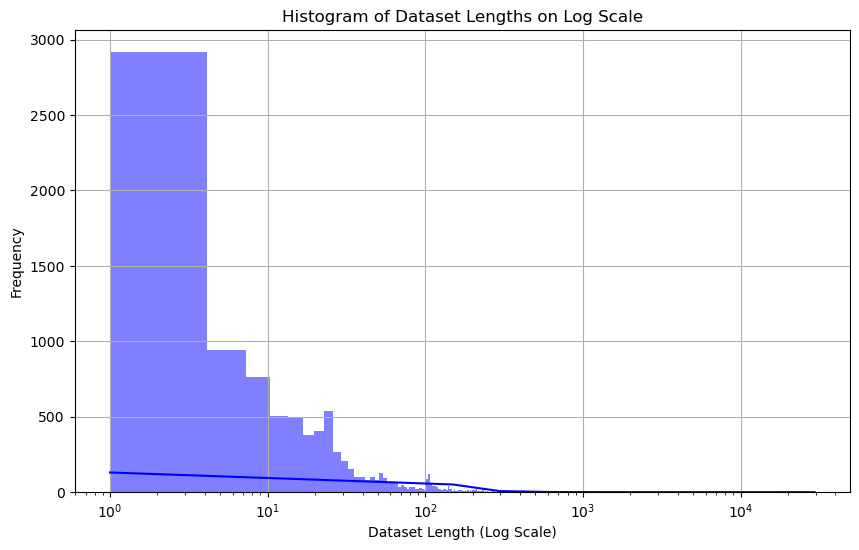

In [5]:
lst_set_filterd = [x for x in lst_set_lengths if x > 0]


plt.figure(figsize=(10, 6))
ax = sns.histplot(lst_set_filterd, kde=True, color='blue', bins='auto')
ax.set(xscale="log")  # Setting the x-axis to logarithmic scale
plt.title('Histogram of Dataset Lengths on Log Scale')
plt.xlabel('Dataset Length (Log Scale)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [6]:
# Create a DataFrame from the lengths
df = pd.DataFrame(lst_set_filterd, columns=['Length'])

# Define bins for the ranges you specified, including an upper limit for the last range
bins = [0, 10, 100, 1000, 10000, 100000, 1000000]

# Use pd.cut to categorize the data into bins
df['Range'] = pd.cut(df['Length'], bins=bins, right=False, include_lowest=True)

# Create a summary table of counts in each range
summary_table = df['Range'].value_counts().sort_index()

# Converting the summary_table to a DataFrame for better formatting
summary_df = summary_table.reset_index()
summary_df.columns = ['Range', 'Count']

summary_df

,Range,Count
0,"[0, 10)",4391
1,"[10, 100)",4341
2,"[100, 1000)",1401
3,"[1000, 10000)",71
4,"[10000, 100000)",5
5,"[100000, 1000000)",0
